In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

In [2]:
def read_json_file(file_name):
    with open(file_name, 'r') as file:
        data = json.load(file)
    return data

In [3]:
path = './results_1bis/'
matrix_names = ["spa1", "spa2", "vem1", "vem2"]
tols = ['1e-04', '1e-06', '1e-08', '1e-10']
all_data = {}
for matrix_name in matrix_names:
    for tol in tols:
        file_name = matrix_name +'_'+ tol + '_results.json'
        data = read_json_file(path + file_name)
        all_data[matrix_name + '_tol_' + str(tol)] = data

## Error analysis

In [4]:
def error(x, xe):
    return np.linalg.norm(x - xe) / np.linalg.norm(xe)

In [5]:
for key, data in all_data.items():
    xe = np.ones(len(data['jacobi']))
    jacobi_err = error(data['jacobi'], xe)
    gauss_seidel_err = error(data['gauss_seidel'], xe)
    gradient_err = error(data['gradient'], xe)
    conjugate_gradient_err = error(data['conjugate_gradient'], xe)
    all_data[key]['jacobi'] = jacobi_err
    all_data[key]['gauss_seidel'] = gauss_seidel_err
    all_data[key]['gradient'] = gradient_err
    all_data[key]['conjugate_gradient'] = conjugate_gradient_err


In [6]:
spa1_jacobi_y = [all_data['spa1_tol_1e-04']['jacobi'], all_data['spa1_tol_1e-06']['jacobi'], 
                all_data['spa1_tol_1e-08']['jacobi'], all_data['spa1_tol_1e-10']['jacobi']]
spa1_gauss_seidel_y = [all_data['spa1_tol_1e-04']['gauss_seidel'], all_data['spa1_tol_1e-06']['gauss_seidel'],
                all_data['spa1_tol_1e-08']['gauss_seidel'], all_data['spa1_tol_1e-10']['gauss_seidel']]
spa1_gradient_y = [all_data['spa1_tol_1e-04']['gradient'], all_data['spa1_tol_1e-06']['gradient'],
                all_data['spa1_tol_1e-08']['gradient'], all_data['spa1_tol_1e-10']['gradient']]
spa1_conjugate_gradient_y = [all_data['spa1_tol_1e-04']['conjugate_gradient'], all_data['spa1_tol_1e-06']['conjugate_gradient'],
                all_data['spa1_tol_1e-08']['conjugate_gradient'], all_data['spa1_tol_1e-10']['conjugate_gradient']]

spa2_jacobi_y = [all_data['spa2_tol_1e-04']['jacobi'], all_data['spa2_tol_1e-06']['jacobi'],
                all_data['spa2_tol_1e-08']['jacobi'], all_data['spa2_tol_1e-10']['jacobi']]
spa2_gauss_seidel_y = [all_data['spa2_tol_1e-04']['gauss_seidel'], all_data['spa2_tol_1e-06']['gauss_seidel'],
                all_data['spa2_tol_1e-08']['gauss_seidel'], all_data['spa2_tol_1e-10']['gauss_seidel']]
spa2_gradient_y = [all_data['spa2_tol_1e-04']['gradient'], all_data['spa2_tol_1e-06']['gradient'],
                all_data['spa2_tol_1e-08']['gradient'], all_data['spa2_tol_1e-10']['gradient']]
spa2_conjugate_gradient_y = [all_data['spa2_tol_1e-04']['conjugate_gradient'], all_data['spa2_tol_1e-06']['conjugate_gradient'],
                all_data['spa2_tol_1e-08']['conjugate_gradient'], all_data['spa2_tol_1e-10']['conjugate_gradient']]

vem1_jacobi_y = [all_data['vem1_tol_1e-04']['jacobi'], all_data['vem1_tol_1e-06']['jacobi'],
                all_data['vem1_tol_1e-08']['jacobi'], all_data['vem1_tol_1e-10']['jacobi']]
vem1_gauss_seidel_y = [all_data['vem1_tol_1e-04']['gauss_seidel'], all_data['vem1_tol_1e-06']['gauss_seidel'],
                all_data['vem1_tol_1e-08']['gauss_seidel'], all_data['vem1_tol_1e-10']['gauss_seidel']]
vem1_gradient_y = [all_data['vem1_tol_1e-04']['gradient'], all_data['vem1_tol_1e-06']['gradient'],
                all_data['vem1_tol_1e-08']['gradient'], all_data['vem1_tol_1e-10']['gradient']]
vem1_conjugate_gradient_y = [all_data['vem1_tol_1e-04']['conjugate_gradient'], all_data['vem1_tol_1e-06']['conjugate_gradient'],
                all_data['vem1_tol_1e-08']['conjugate_gradient'], all_data['vem1_tol_1e-10']['conjugate_gradient']]

vem2_jacobi_y = [all_data['vem2_tol_1e-04']['jacobi'], all_data['vem2_tol_1e-06']['jacobi'],
                all_data['vem2_tol_1e-08']['jacobi'], all_data['vem2_tol_1e-10']['jacobi']]
vem2_gauss_seidel_y = [all_data['vem2_tol_1e-04']['gauss_seidel'], all_data['vem2_tol_1e-06']['gauss_seidel'],
                all_data['vem2_tol_1e-08']['gauss_seidel'], all_data['vem2_tol_1e-10']['gauss_seidel']]
vem2_gradient_y = [all_data['vem2_tol_1e-04']['gradient'], all_data['vem2_tol_1e-06']['gradient'],
                all_data['vem2_tol_1e-08']['gradient'], all_data['vem2_tol_1e-10']['gradient']]
vem2_conjugate_gradient_y = [all_data['vem2_tol_1e-04']['conjugate_gradient'], all_data['vem2_tol_1e-06']['conjugate_gradient'],
                all_data['vem2_tol_1e-08']['conjugate_gradient'], all_data['vem2_tol_1e-10']['conjugate_gradient']]



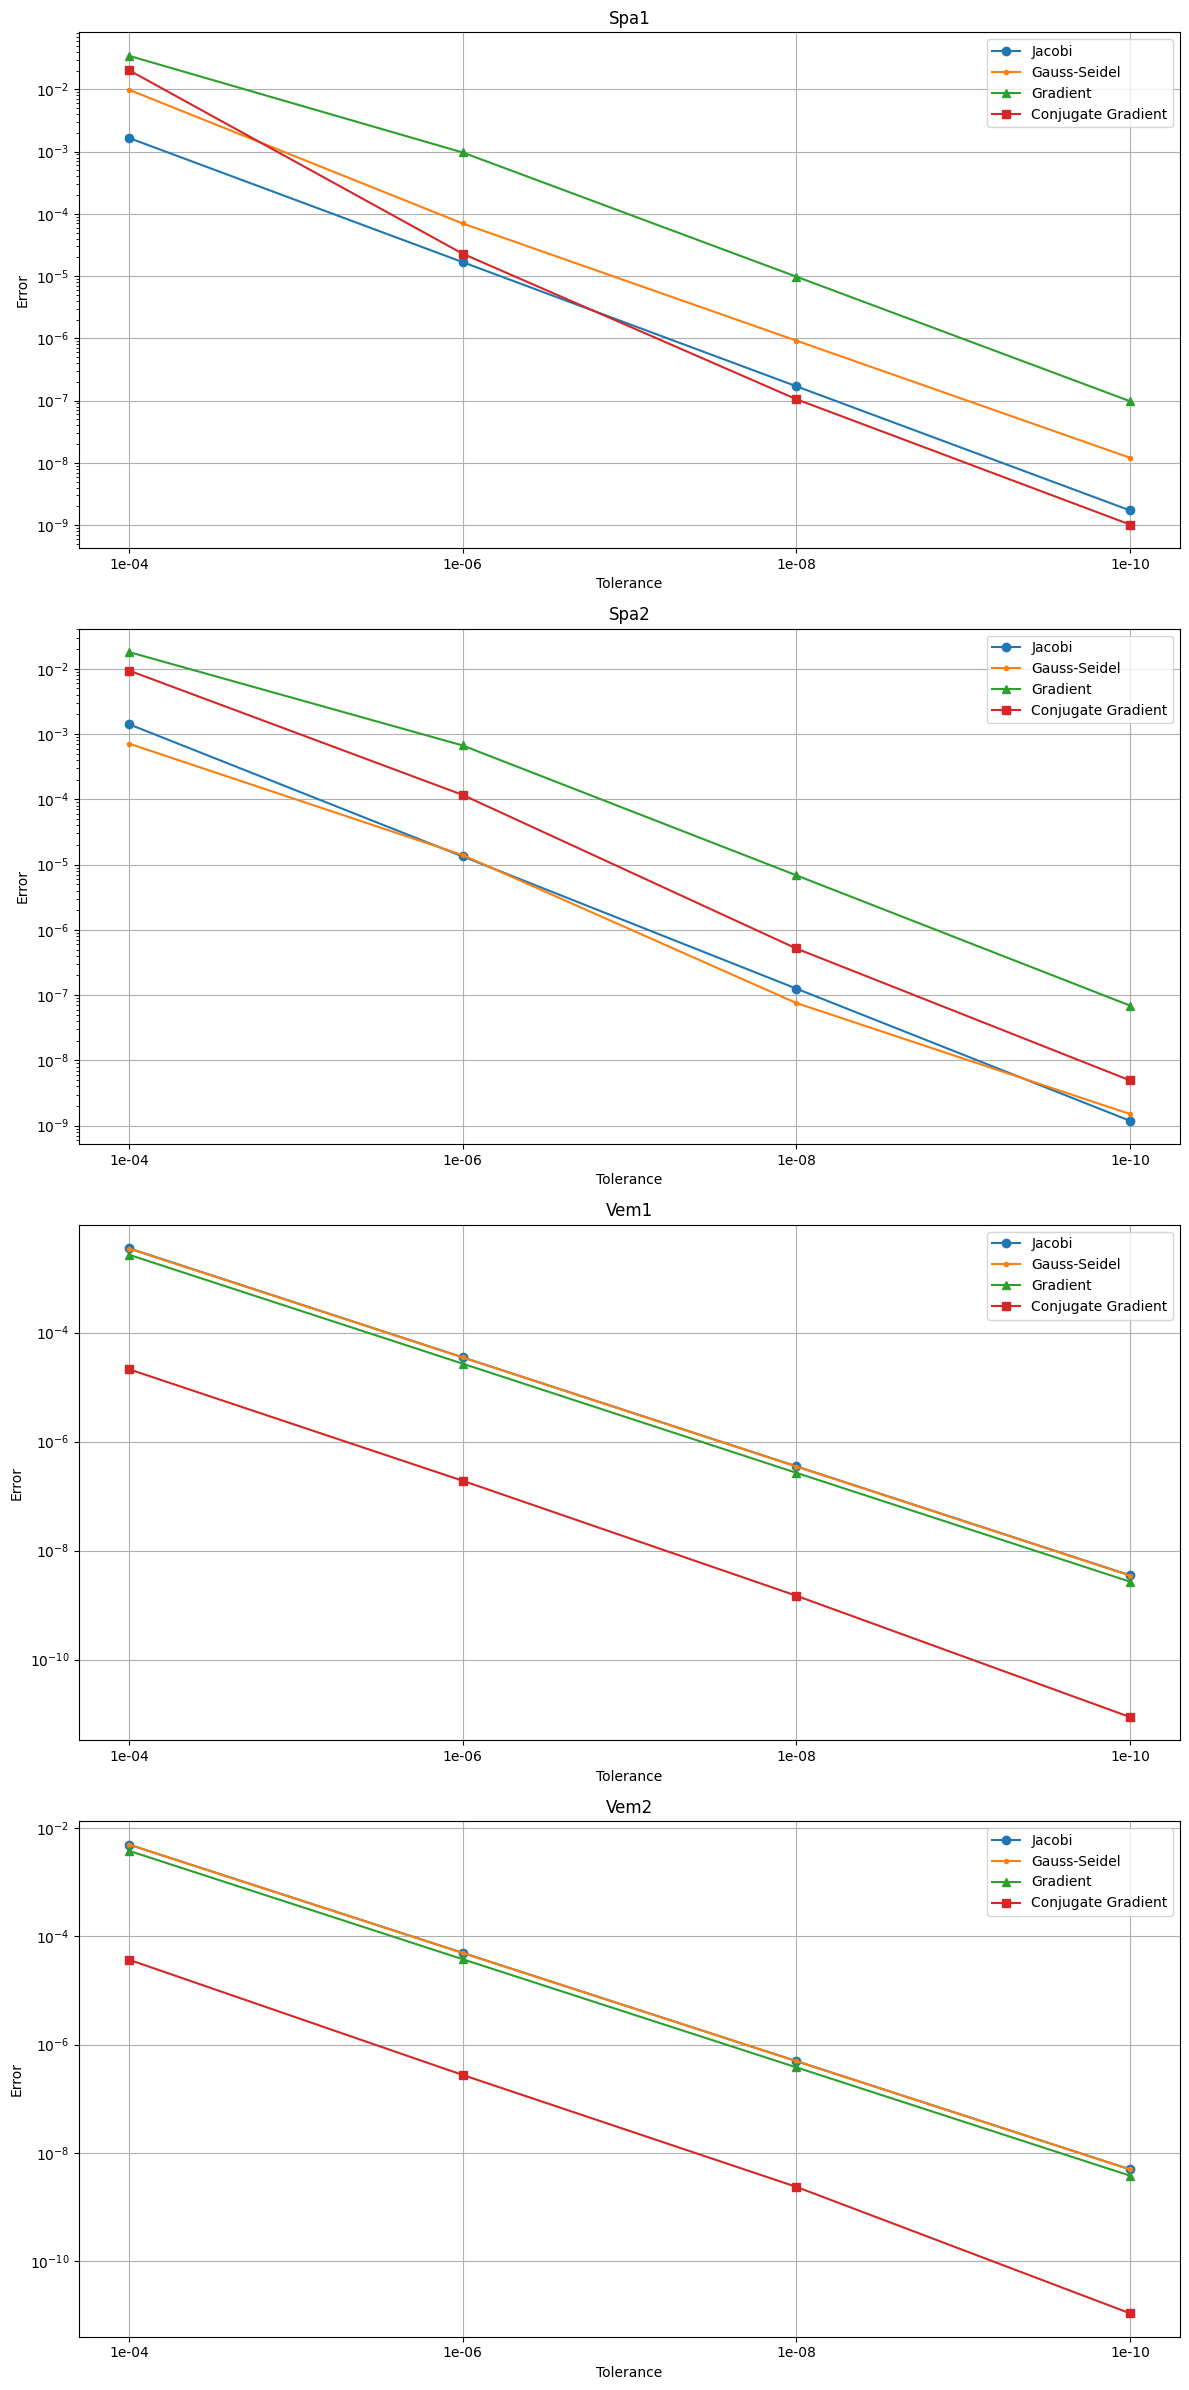

In [7]:
# Definizione dei dati per i plot
data = [
    (spa1_jacobi_y, spa1_gauss_seidel_y, spa1_gradient_y, spa1_conjugate_gradient_y, 'Spa1'),
    (spa2_jacobi_y, spa2_gauss_seidel_y, spa2_gradient_y, spa2_conjugate_gradient_y, 'Spa2'),
    (vem1_jacobi_y, vem1_gauss_seidel_y, vem1_gradient_y, vem1_conjugate_gradient_y, 'Vem1'),
    (vem2_jacobi_y, vem2_gauss_seidel_y, vem2_gradient_y, vem2_conjugate_gradient_y, 'Vem2')
]

# Creazione del multiplot
fig, axs = plt.subplots(4, 1, figsize=(12, 24))  # Aumento delle dimensioni delle figure

for ax, (jacobi_y, gauss_seidel_y, gradient_y, conjugate_gradient_y, title) in zip(axs.flatten(), data):
    ax.plot(jacobi_y, marker='o', label='Jacobi')
    ax.plot(gauss_seidel_y, marker='.', label='Gauss-Seidel')
    ax.plot(gradient_y, marker='^', label='Gradient')
    ax.plot(conjugate_gradient_y, marker='s', label='Conjugate Gradient')
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(tols)
    ax.set_xlabel('Tolerance')
    ax.set_ylabel('Error')
    ax.set_title(title)
    ax.set_yscale('log')
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()

## Time

In [8]:
spa1_jacobi_y = [all_data['spa1_tol_1e-04']['jacobi_mean'], all_data['spa1_tol_1e-06']['jacobi_mean'], 
                all_data['spa1_tol_1e-08']['jacobi_mean'], all_data['spa1_tol_1e-10']['jacobi_mean']]
spa1_gauss_seidel_y = [all_data['spa1_tol_1e-04']['gauss_seidel_mean'], all_data['spa1_tol_1e-06']['gauss_seidel_mean'],
                all_data['spa1_tol_1e-08']['gauss_seidel_mean'], all_data['spa1_tol_1e-10']['gauss_seidel_mean']]
spa1_gradient_y = [all_data['spa1_tol_1e-04']['gradient_mean'], all_data['spa1_tol_1e-06']['gradient_mean'],
                all_data['spa1_tol_1e-08']['gradient_mean'], all_data['spa1_tol_1e-10']['gradient_mean']]
spa1_conjugate_gradient_y = [all_data['spa1_tol_1e-04']['conjugate_gradient_mean'], all_data['spa1_tol_1e-06']['conjugate_gradient_mean'],
                all_data['spa1_tol_1e-08']['conjugate_gradient_mean'], all_data['spa1_tol_1e-10']['conjugate_gradient_mean']]

spa2_jacobi_y = [all_data['spa2_tol_1e-04']['jacobi_mean'], all_data['spa2_tol_1e-06']['jacobi_mean'],
                all_data['spa2_tol_1e-08']['jacobi_mean'], all_data['spa2_tol_1e-10']['jacobi_mean']]
spa2_gauss_seidel_y = [all_data['spa2_tol_1e-04']['gauss_seidel_mean'], all_data['spa2_tol_1e-06']['gauss_seidel_mean'],
                all_data['spa2_tol_1e-08']['gauss_seidel_mean'], all_data['spa2_tol_1e-10']['gauss_seidel_mean']]
spa2_gradient_y = [all_data['spa2_tol_1e-04']['gradient_mean'], all_data['spa2_tol_1e-06']['gradient_mean'],
                all_data['spa2_tol_1e-08']['gradient_mean'], all_data['spa2_tol_1e-10']['gradient_mean']]
spa2_conjugate_gradient_y = [all_data['spa2_tol_1e-04']['conjugate_gradient_mean'], all_data['spa2_tol_1e-06']['conjugate_gradient_mean'],
                all_data['spa2_tol_1e-08']['conjugate_gradient_mean'], all_data['spa2_tol_1e-10']['conjugate_gradient_mean']]

vem1_jacobi_y = [all_data['vem1_tol_1e-04']['jacobi_mean'], all_data['vem1_tol_1e-06']['jacobi_mean'],
                all_data['vem1_tol_1e-08']['jacobi_mean'], all_data['vem1_tol_1e-10']['jacobi_mean']]
vem1_gauss_seidel_y = [all_data['vem1_tol_1e-04']['gauss_seidel_mean'], all_data['vem1_tol_1e-06']['gauss_seidel_mean'],
                all_data['vem1_tol_1e-08']['gauss_seidel_mean'], all_data['vem1_tol_1e-10']['gauss_seidel_mean']]
vem1_gradient_y = [all_data['vem1_tol_1e-04']['gradient_mean'], all_data['vem1_tol_1e-06']['gradient_mean'],
                all_data['vem1_tol_1e-08']['gradient_mean'], all_data['vem1_tol_1e-10']['gradient_mean']]
vem1_conjugate_gradient_y = [all_data['vem1_tol_1e-04']['conjugate_gradient_mean'], all_data['vem1_tol_1e-06']['conjugate_gradient_mean'],
                all_data['vem1_tol_1e-08']['conjugate_gradient_mean'], all_data['vem1_tol_1e-10']['conjugate_gradient_mean']]

vem2_jacobi_y = [all_data['vem2_tol_1e-04']['jacobi_mean'], all_data['vem2_tol_1e-06']['jacobi_mean'],
                all_data['vem2_tol_1e-08']['jacobi_mean'], all_data['vem2_tol_1e-10']['jacobi_mean']]
vem2_gauss_seidel_y = [all_data['vem2_tol_1e-04']['gauss_seidel_mean'], all_data['vem2_tol_1e-06']['gauss_seidel_mean'],
                all_data['vem2_tol_1e-08']['gauss_seidel_mean'], all_data['vem2_tol_1e-10']['gauss_seidel_mean']]
vem2_gradient_y = [all_data['vem2_tol_1e-04']['gradient_mean'], all_data['vem2_tol_1e-06']['gradient_mean'],
                all_data['vem2_tol_1e-08']['gradient_mean'], all_data['vem2_tol_1e-10']['gradient_mean']]
vem2_conjugate_gradient_y = [all_data['vem2_tol_1e-04']['conjugate_gradient_mean'], all_data['vem2_tol_1e-06']['conjugate_gradient_mean'],
                all_data['vem2_tol_1e-08']['conjugate_gradient_mean'], all_data['vem2_tol_1e-10']['conjugate_gradient_mean']]

In [9]:
spa1_jacobi_y_std = [all_data['spa1_tol_1e-04']['jacobi_std'], all_data['spa1_tol_1e-06']['jacobi_std'], 
                    all_data['spa1_tol_1e-08']['jacobi_std'], all_data['spa1_tol_1e-10']['jacobi_std']]
spa1_gauss_seidel_y_std = [all_data['spa1_tol_1e-04']['gauss_seidel_std'], all_data['spa1_tol_1e-06']['gauss_seidel_std'],
                    all_data['spa1_tol_1e-08']['gauss_seidel_std'], all_data['spa1_tol_1e-10']['gauss_seidel_std']]
spa1_gradient_y_std = [all_data['spa1_tol_1e-04']['gradient_std'], all_data['spa1_tol_1e-06']['gradient_std'],
                    all_data['spa1_tol_1e-08']['gradient_std'], all_data['spa1_tol_1e-10']['gradient_std']]
spa1_conjugate_gradient_y_std = [all_data['spa1_tol_1e-04']['conjugate_gradient_std'], all_data['spa1_tol_1e-06']['conjugate_gradient_std'],
                    all_data['spa1_tol_1e-08']['conjugate_gradient_std'], all_data['spa1_tol_1e-10']['conjugate_gradient_std']]

spa2_jacobi_y_std = [all_data['spa2_tol_1e-04']['jacobi_std'], all_data['spa2_tol_1e-06']['jacobi_std'],
                    all_data['spa2_tol_1e-08']['jacobi_std'], all_data['spa2_tol_1e-10']['jacobi_std']]
spa2_gauss_seidel_y_std = [all_data['spa2_tol_1e-04']['gauss_seidel_std'], all_data['spa2_tol_1e-06']['gauss_seidel_std'],
                    all_data['spa2_tol_1e-08']['gauss_seidel_std'], all_data['spa2_tol_1e-10']['gauss_seidel_std']]
spa2_gradient_y_std = [all_data['spa2_tol_1e-04']['gradient_std'], all_data['spa2_tol_1e-06']['gradient_std'],
                    all_data['spa2_tol_1e-08']['gradient_std'], all_data['spa2_tol_1e-10']['gradient_std']]
spa2_conjugate_gradient_y_std = [all_data['spa2_tol_1e-04']['conjugate_gradient_std'], all_data['spa2_tol_1e-06']['conjugate_gradient_std'],
                    all_data['spa2_tol_1e-08']['conjugate_gradient_std'], all_data['spa2_tol_1e-10']['conjugate_gradient_std']]

vem1_jacobi_y_std = [all_data['vem1_tol_1e-04']['jacobi_std'], all_data['vem1_tol_1e-06']['jacobi_std'],
                    all_data['vem1_tol_1e-08']['jacobi_std'], all_data['vem1_tol_1e-10']['jacobi_std']]
vem1_gauss_seidel_y_std = [all_data['vem1_tol_1e-04']['gauss_seidel_std'], all_data['vem1_tol_1e-06']['gauss_seidel_std'],
                    all_data['vem1_tol_1e-08']['gauss_seidel_std'], all_data['vem1_tol_1e-10']['gauss_seidel_std']]
vem1_gradient_y_std = [all_data['vem1_tol_1e-04']['gradient_std'], all_data['vem1_tol_1e-06']['gradient_std'],
                    all_data['vem1_tol_1e-08']['gradient_std'], all_data['vem1_tol_1e-10']['gradient_std']]
vem1_conjugate_gradient_y_std = [all_data['vem1_tol_1e-04']['conjugate_gradient_std'], all_data['vem1_tol_1e-06']['conjugate_gradient_std'],
                    all_data['vem1_tol_1e-08']['conjugate_gradient_std'], all_data['vem1_tol_1e-10']['conjugate_gradient_std']]

vem2_jacobi_y_std = [all_data['vem2_tol_1e-04']['jacobi_std'], all_data['vem2_tol_1e-06']['jacobi_std'],
                    all_data['vem2_tol_1e-08']['jacobi_std'], all_data['vem2_tol_1e-10']['jacobi_std']]
vem2_gauss_seidel_y_std = [all_data['vem2_tol_1e-04']['gauss_seidel_std'], all_data['vem2_tol_1e-06']['gauss_seidel_std'],
                    all_data['vem2_tol_1e-08']['gauss_seidel_std'], all_data['vem2_tol_1e-10']['gauss_seidel_std']]
vem2_gradient_y_std = [all_data['vem2_tol_1e-04']['gradient_std'], all_data['vem2_tol_1e-06']['gradient_std'],
                    all_data['vem2_tol_1e-08']['gradient_std'], all_data['vem2_tol_1e-10']['gradient_std']]
vem2_conjugate_gradient_y_std = [all_data['vem2_tol_1e-04']['conjugate_gradient_std'], all_data['vem2_tol_1e-06']['conjugate_gradient_std'],
                    all_data['vem2_tol_1e-08']['conjugate_gradient_std'], all_data['vem2_tol_1e-10']['conjugate_gradient_std']]

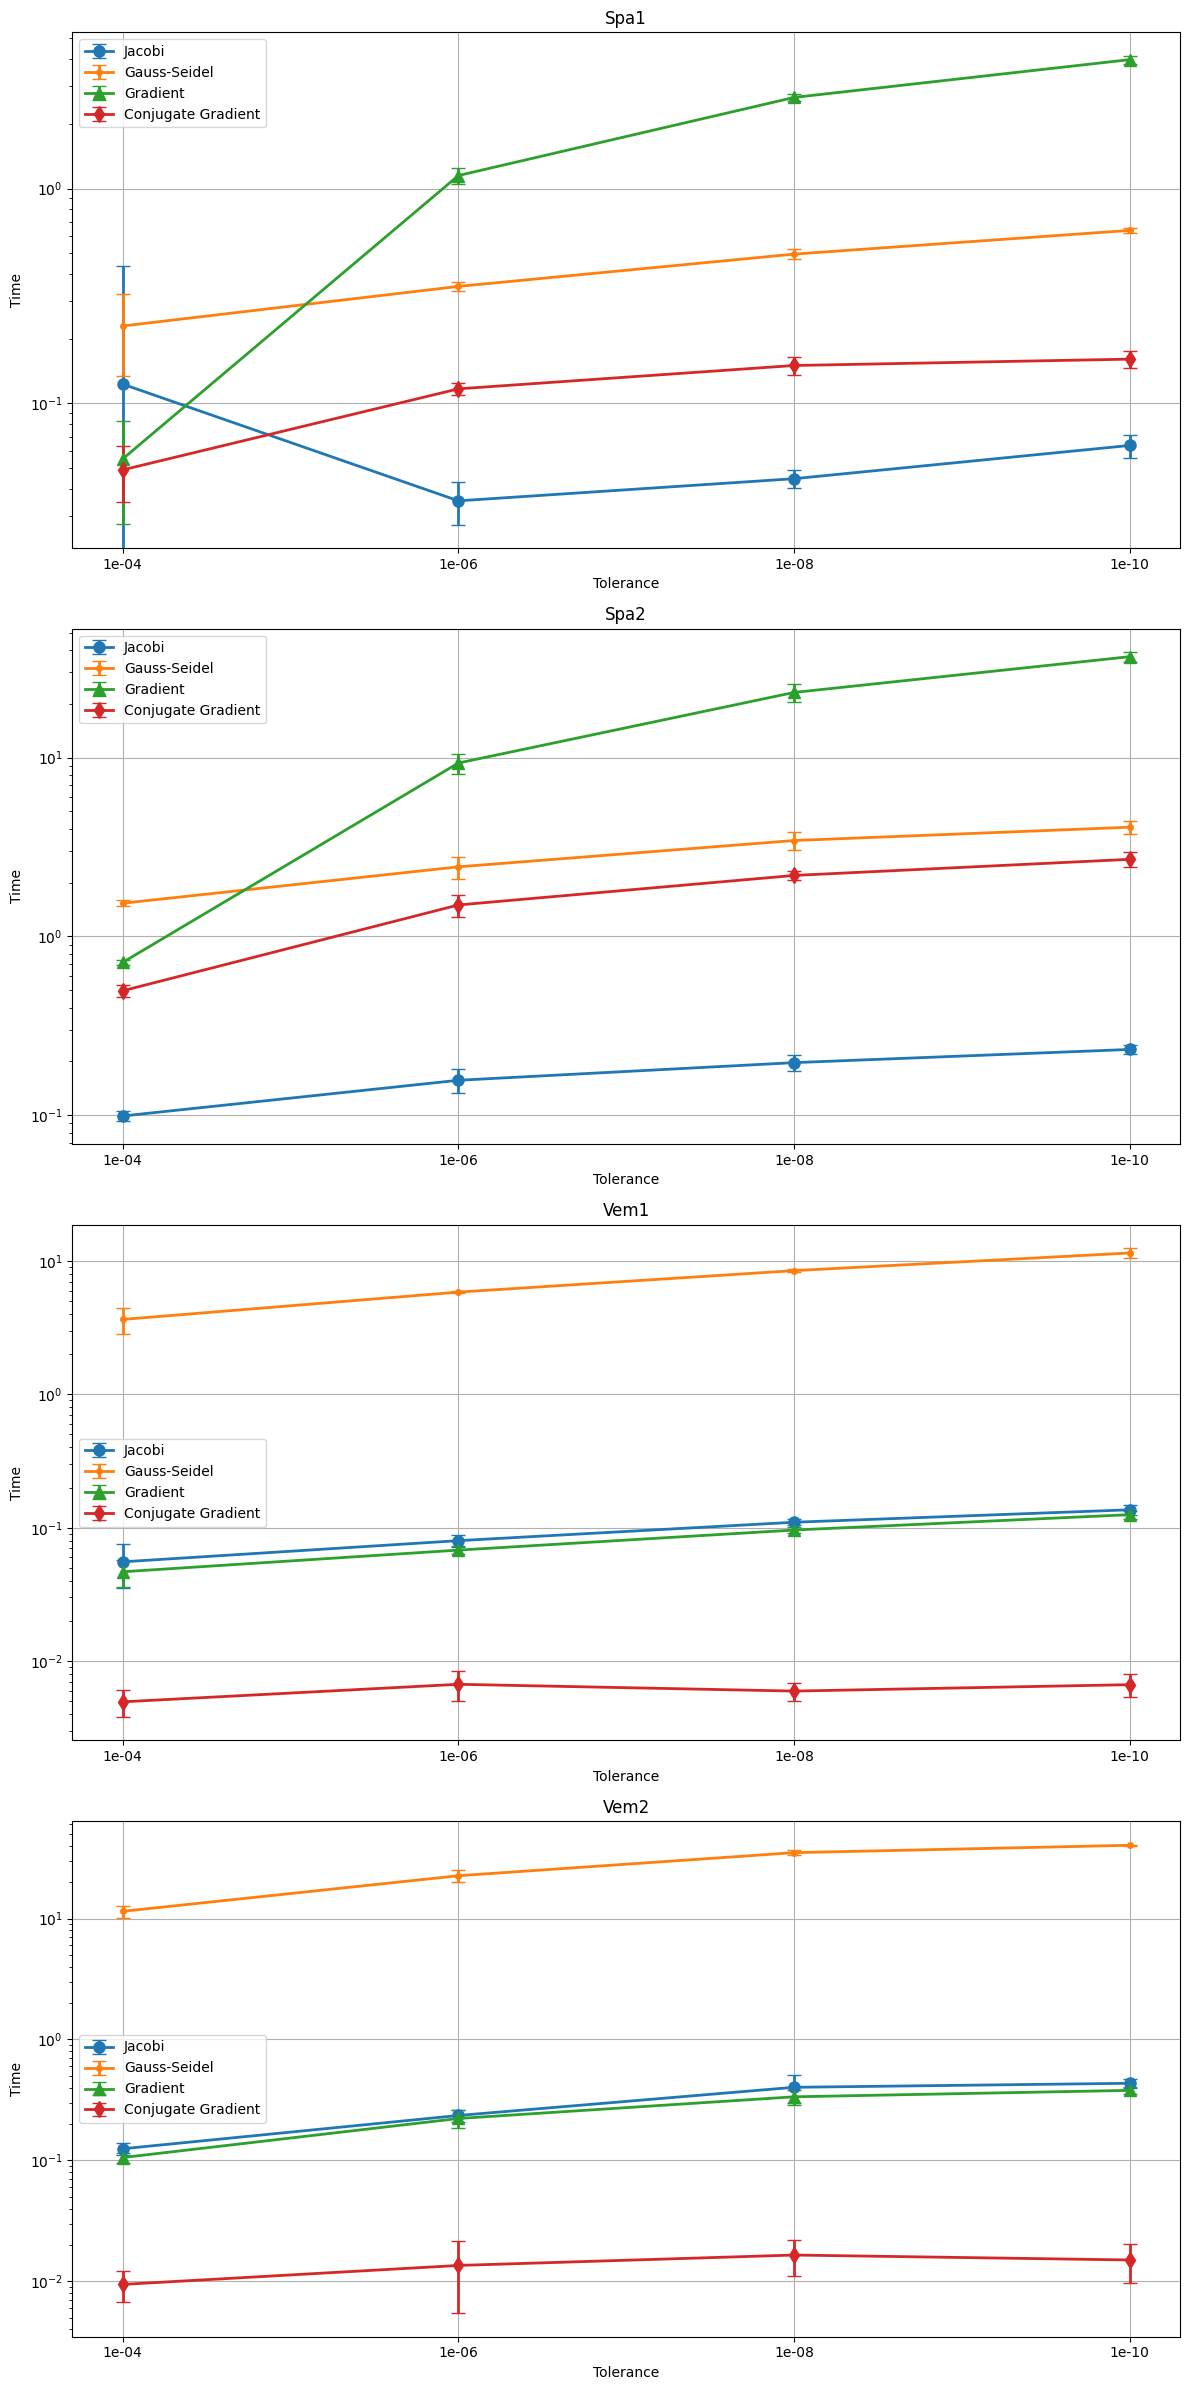

In [10]:
# Definizione dei dati per i plot
data = [
    (spa1_jacobi_y, spa1_gauss_seidel_y, spa1_gradient_y, spa1_conjugate_gradient_y, spa1_jacobi_y_std, spa1_gauss_seidel_y_std, spa1_gradient_y_std, spa1_conjugate_gradient_y_std, 'Spa1'),
    (spa2_jacobi_y, spa2_gauss_seidel_y, spa2_gradient_y, spa2_conjugate_gradient_y, spa2_jacobi_y_std, spa2_gauss_seidel_y_std, spa2_gradient_y_std, spa2_conjugate_gradient_y_std, 'Spa2'),
    (vem1_jacobi_y, vem1_gauss_seidel_y, vem1_gradient_y, vem1_conjugate_gradient_y, vem1_jacobi_y_std, vem1_gauss_seidel_y_std, vem1_gradient_y_std, vem1_conjugate_gradient_y_std, 'Vem1'),
    (vem2_jacobi_y, vem2_gauss_seidel_y, vem2_gradient_y, vem2_conjugate_gradient_y, vem2_jacobi_y_std, vem2_gauss_seidel_y_std, vem2_gradient_y_std, vem2_conjugate_gradient_y_std, 'Vem2')
]

# Creazione del multiplot
fig, axs = plt.subplots(4, 1, figsize=(12, 24))  # Aumento delle dimensioni delle figure

for ax, (jacobi_y, gauss_seidel_y, gradient_y, conjugate_gradient_y, jacobi_std, gauss_std, gradient_std, gradient_des_std, title) in zip(axs.flatten(), data):
    ax.errorbar(np.arange(4), jacobi_y, yerr=jacobi_std, label='Jacobi', capsize=5, markersize=8, linewidth=2, marker='o')
    ax.errorbar(np.arange(4), gauss_seidel_y, yerr=gauss_std, label='Gauss-Seidel', capsize=5, markersize=8, linewidth=2, marker='.')
    ax.errorbar(np.arange(4), gradient_y, yerr=gradient_std, label='Gradient', capsize=5, markersize=8, linewidth=2, marker='^')
    ax.errorbar(np.arange(4), conjugate_gradient_y, yerr=gradient_des_std, label='Conjugate Gradient', capsize=5, markersize=8, linewidth=2, marker='d')
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(tols)
    ax.set_xlabel('Tolerance')
    ax.set_ylabel('Time')
    ax.set_title(title)
    ax.set_yscale('log')
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()

## Total iteration

In [11]:
with open('results_1bis/last_iterations.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Matrix', 'Tolerance', 'Jacobi', 'Gauss-Seidel', 'Gradient', 'Conjugate Gradient'])
    for tol in tols:
        for matrix_name in matrix_names:
            writer.writerow([matrix_name, tol, all_data[matrix_name + '_tol_' + tol]['jacobi_k_iter'], all_data[matrix_name + '_tol_' + tol]['gauss_seidel_k_iter'], 
                             all_data[matrix_name + '_tol_' + tol]['gradient_k_iter'], all_data[matrix_name + '_tol_' + tol]['conjugate_gradient_k_iter']])

## Iteration

In [14]:
iterations = pd.read_csv('results_1bis/last_iterations.csv')
iterations.head()

,Matrix,Tolerance,Jacobi,Gauss-Seidel,Gradient,Conjugate Gradient
0,spa1,0.000100,116,10,144,50
1,spa2,0.000100,37,6,162,43
2,vem1,0.000100,1315,660,891,39
3,vem2,0.000100,1928,966,1309,48
4,spa1,0.000001,182,18,3578,135


In [34]:
# Funzione per aggiungere etichette sulle barre
def autolabel(rects):
    """Attaches a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

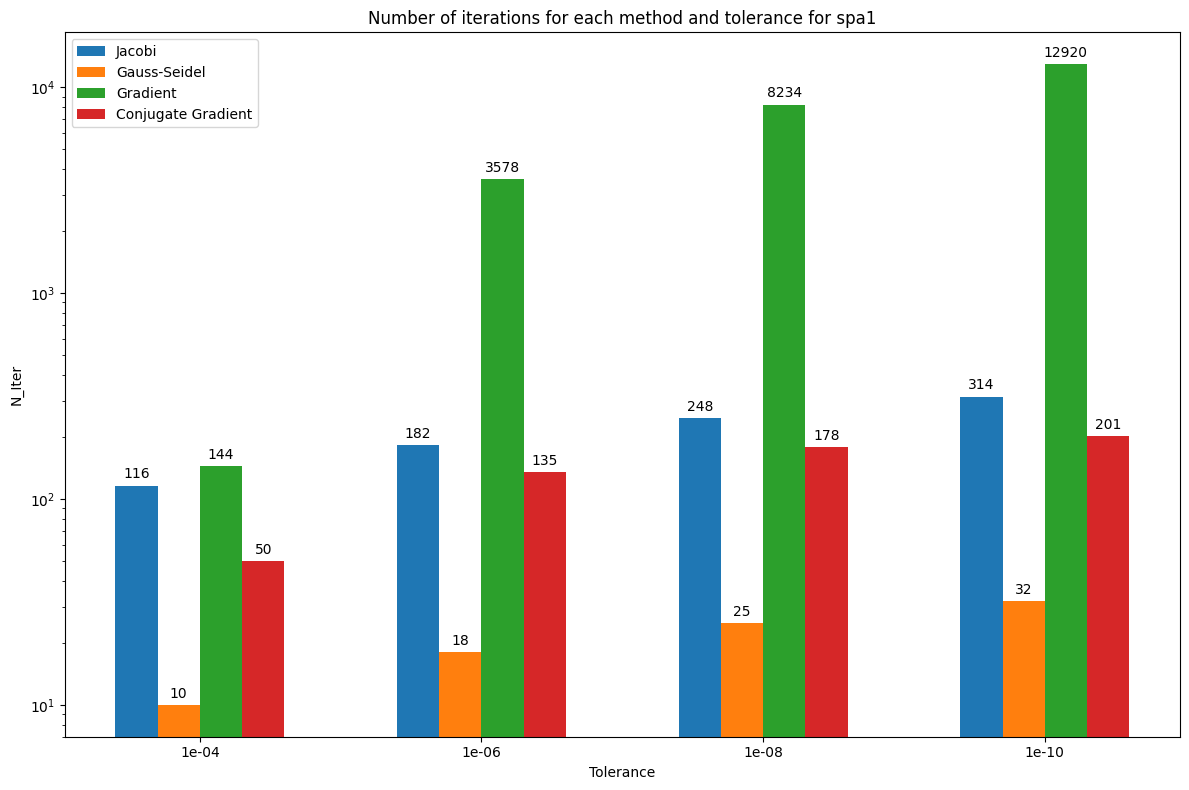

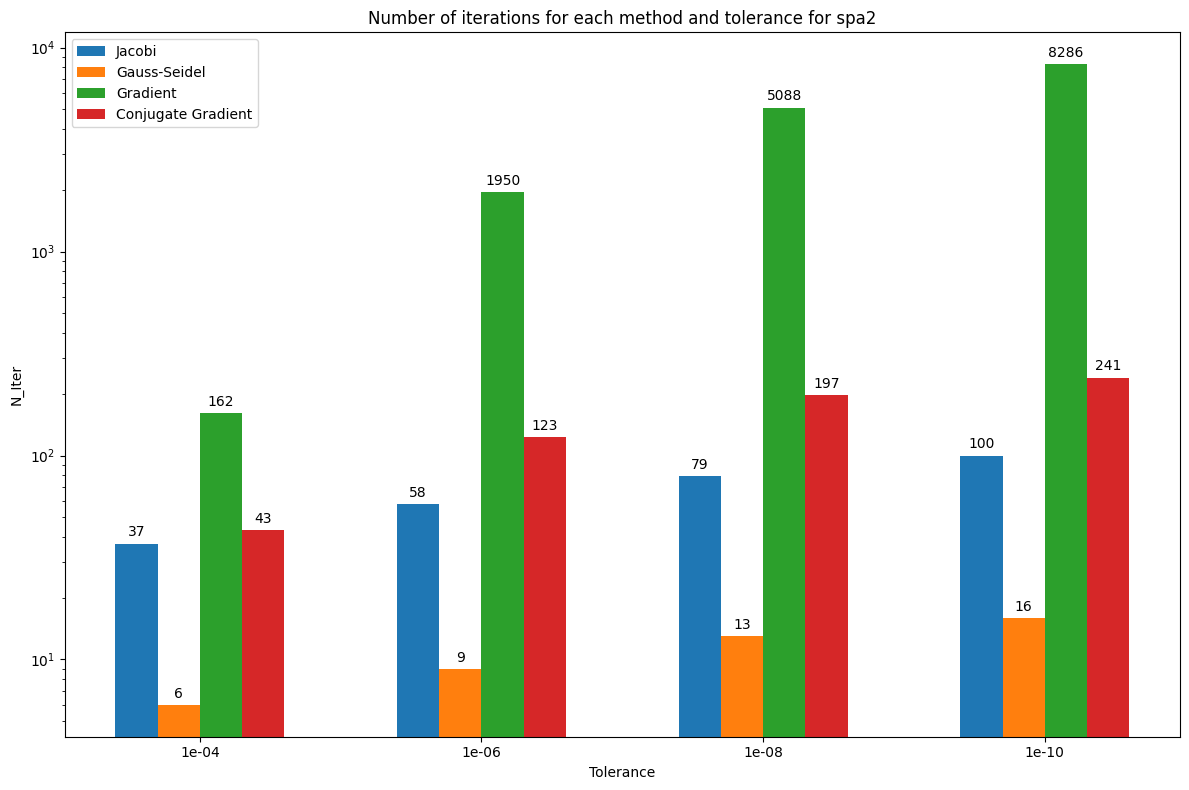

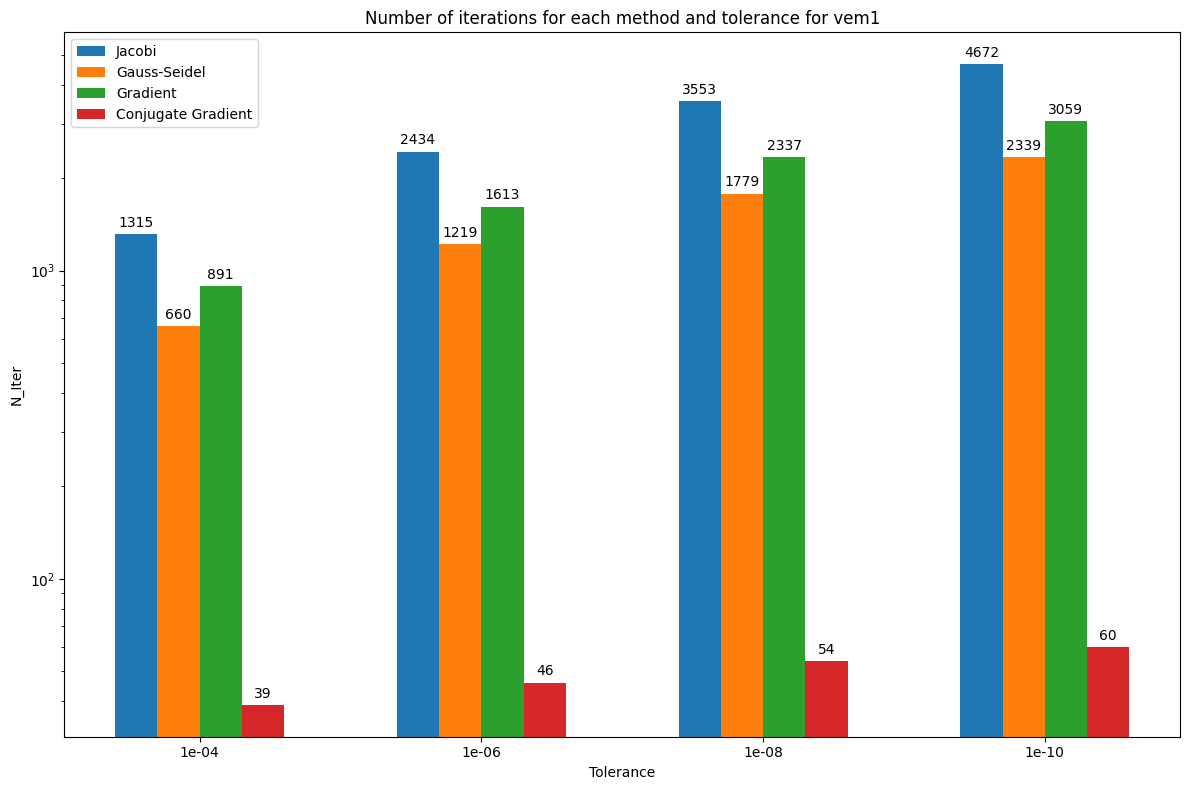

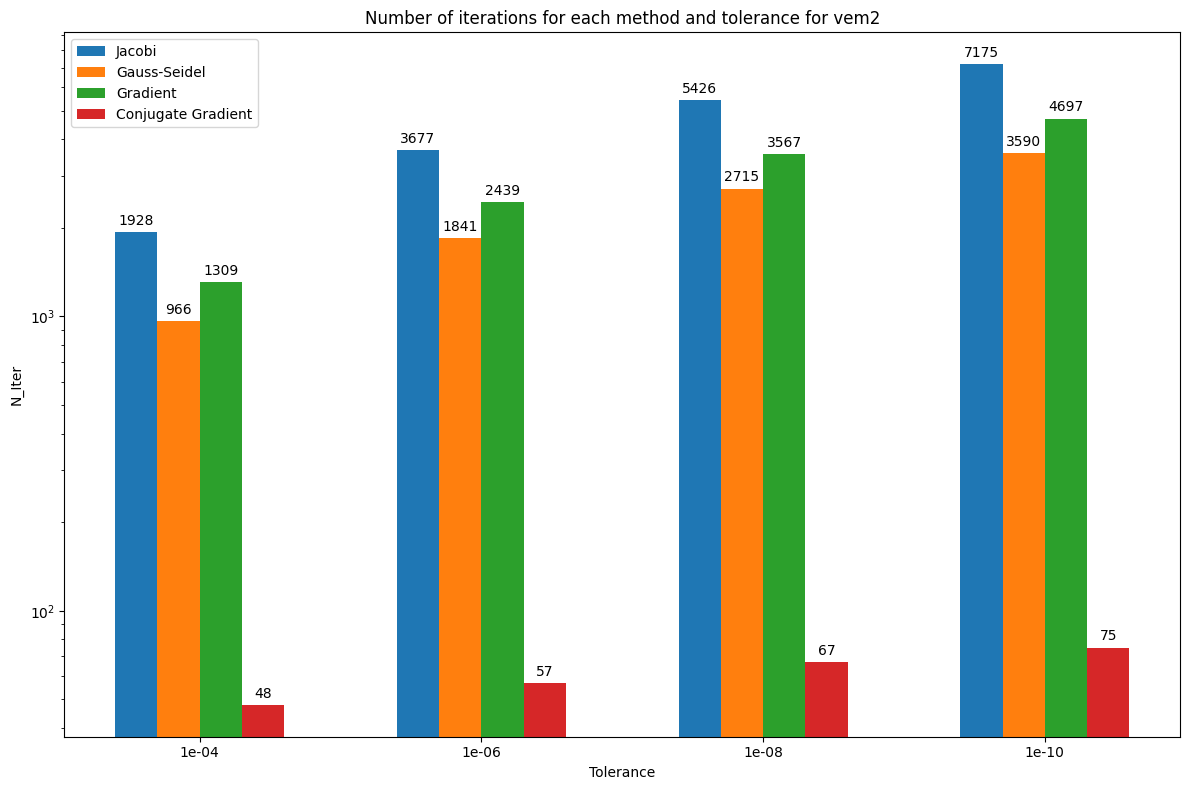

In [35]:
matrices = ['spa1', 'spa2', 'vem1', 'vem2']

for matrix in matrices:

# Estrazione dei dati
    jacobi = iterations.loc[iterations['Matrix']==matrix, 'Jacobi']
    gauss = iterations.loc[iterations['Matrix']==matrix, 'Gauss-Seidel']
    gradient = iterations.loc[iterations['Matrix']==matrix, 'Gradient']
    conj = iterations.loc[iterations['Matrix']==matrix, 'Conjugate Gradient']

    # Configurazione del grafico
    x = np.arange(4)  # posizione delle barre
    width = 0.15  # larghezza delle barre

    fig, ax = plt.subplots(figsize=(12, 8))

    # Creazione delle barre con errori
    rects1 = ax.bar(x - 2*width + width/2, jacobi, width, label='Jacobi', capsize=5)
    rects2 = ax.bar(x - width + width/2, gauss, width, label='Gauss-Seidel', capsize=5)
    rects3 = ax.bar(x + width - width/2, gradient, width, label='Gradient', capsize=5)
    rects4 = ax.bar(x + 2*width - width/2, conj, width, label='Conjugate Gradient', capsize=5)

    ax.set_yscale('log')

    # Aggiunta delle etichette, titolo e legenda
    ax.set_xlabel('Tolerance')
    ax.set_ylabel('N_Iter')
    ax.set_title(f'Number of iterations for each method and tolerance for {matrix}')
    ax.set_xticks(x)
    ax.set_xticklabels(tols)
    ax.legend()

    # Aggiunta delle etichette
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()

    plt.show()